In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glacier
import glacier_v3
import cmocean
import importlib
from matplotlib import pyplot as plt, animation, rc
from IPython.display import Image
rc('animation', html='html5')
from scipy.sparse import spdiags

In [99]:
importlib.reload(glacier_v3)
ngridx=50
ngridz=20
D=200 # m
L=2e4 # m
dt= 2e2 # 
T= 500*dt# 1e6 
alpha=0.4/86400
ML=20
zz=0 # dont use values on the second grid cell (unstable solution)
C,S,u=glacier_v3.glacier(ngridx,ngridz,dt,zz,T,ML,alpha,motion = True)
#Cs, Ss =glacier.glacier(ngridx,ngridz,dt,zz,T,ML,alpha, steady = False)

Text(0.45, 0.95, 'Diffusion only Methane and Salinity Concentration')

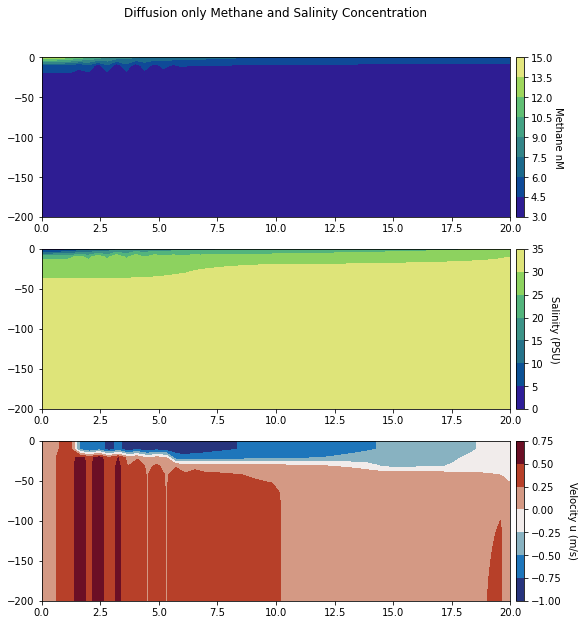

In [100]:
# Plot Diffusion only:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(3,1,figsize=(10,10))
z = np.linspace(0,D,ngridz+1)
x = np.linspace(0,L/1e3,ngridx+1)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,C[-1,:,:].T,cmap=cmap)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,S[-1,:,:].T,cmap=cmap)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
cb2.set_label('Salinity (PSU)', rotation=270)

zu = np.linspace(0,D,ngridz)
xu = np.linspace(0,L/1e3,ngridx)
Xu,Zu=np.meshgrid(xu,zu)
cmapu=cmocean.cm.balance

c3=axs[2].contourf(Xu,-Zu,u[-1,:,:].T,cmap=cmapu)
cb3=fig.colorbar(c3,ax=axs[2],pad=0.01)
cb3.ax.get_yaxis().labelpad = 15
cb3.set_label('Velocity u (m/s)', rotation=270)

fig.suptitle('Diffusion only Methane and Salinity Concentration',y=0.95,x=0.45)
#fig.supxlabel('Distance from glacier (km)',x=0.45)
#fig.supylabel('Depth (m)',x=0.05)
#plt.savefig('SteadyDiffusion.pdf')

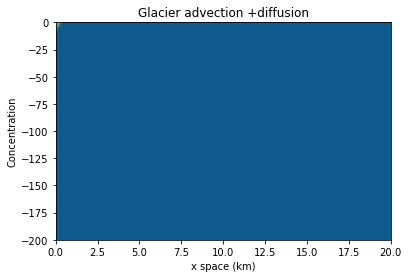

In [101]:
#C,S=glacier_v3.glacier(ngridx,ngridz,dt,zz,T,ML,alpha,motion = True)
fig = plt.figure()
def animate(frames):
    if frames > T:
        factor=int(frames/T)
        frames=frames-(T*factor)
        
    plt.clf()
    ax = fig.add_subplot(111)
    a = C[int(frames),:,:] 
    oo = plt.contourf(X,-Z,a.T,vmin=0,vmax=15,cmap=cmap)
    plt.title(titulo)
    plt.ylabel('Concentration')
    plt.xlabel('x space (km)')
    #plt.grid()
    
    return oo
titulo=str('Glacier advection +diffusion')
anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,int(T/dt)-1,5))
f = r"/Users/jvalenti/Desktop/adv.gif" 
FFwriter = animation.FFMpegWriter()
anim.save(f, writer = FFwriter)

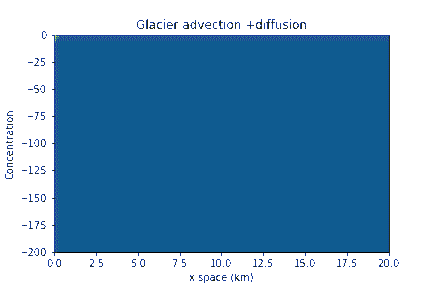

In [102]:
with open(f,'rb') as anim:
    display(Image(anim.read()))